In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("../data/market.csv")
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


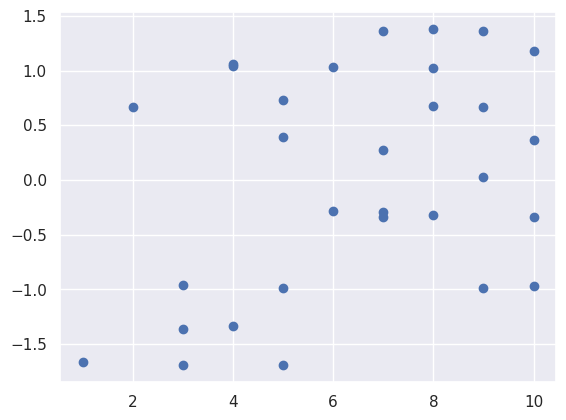

In [3]:
plt.scatter(x = data["Satisfaction"], y = data["Loyalty"])

In [4]:
X = data.copy()

In [5]:
kmeans = KMeans(2)
kmeans.fit(X)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [6]:
clusters = X.copy()
clusters['cluster_pred'] = kmeans.fit_predict(X)

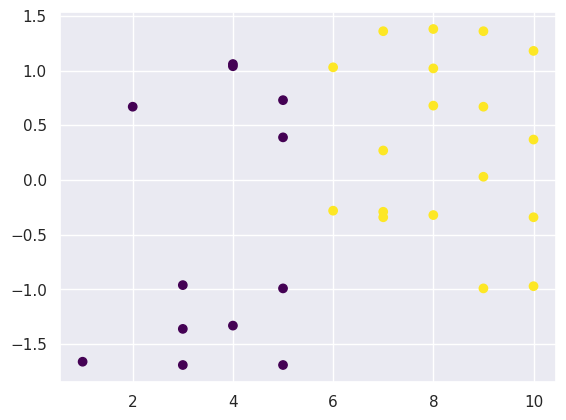

In [7]:
plt.scatter(x=clusters["Satisfaction"], y=clusters["Loyalty"], c=clusters["cluster_pred"], cmap='viridis')


In [8]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [9]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)


wcss


[60.0,
 30.35236058808774,
 17.913349527387968,
 10.247181805928422,
 9.236213145874501,
 6.569489487091783,
 5.326631124753925,
 5.156699735420668,
 3.804128903766371]

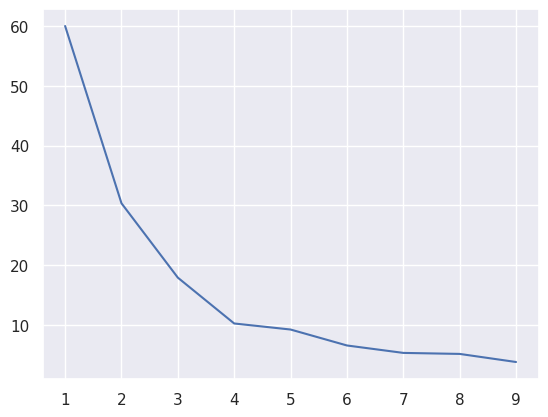

In [10]:
plt.plot(range(1, 10), wcss)


In [11]:
kmeans_new = KMeans(4)
kmeans_new.fit_predict(X_scaled)
clusters_new = X.copy()
clusters_new["Cluster_pred"] = kmeans_new.fit_predict(X_scaled)

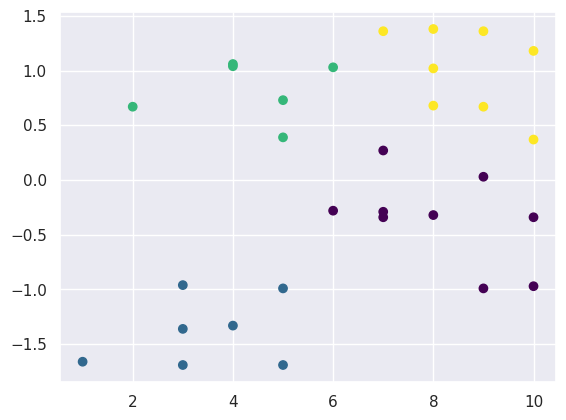

In [12]:
plt.scatter(x=clusters_new["Satisfaction"], y=clusters_new["Loyalty"], c=clusters_new["Cluster_pred"], cmap='viridis')
